In [ ]:
# !pip3 install numpy
# !pip3 install tasklogger
# !pip3 install joblib
# !pip3 install graphtools
# !pip3 install matplotlib
# !pip3 install pandas

In [3]:
import numpy as np
import matplotlib,os
import matplotlib.pyplot as plt
import matplotlib.cm
from sklearn import preprocessing
import pickle
import sys
import pandas as pd
import random
from timeit import default_timer as timer
from scipy import stats
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def shuffleRows(arr1):
    arr1=list(arr1)
    random.shuffle(arr1)
    arr1=np.asarray(arr1)
    return arr1

class Scaling:
    def fit(self, train=0, test=0):
        self.scaler = sklearn.preprocessing.StandardScaler()  # z = (x - u) / s
        self.scaler.fit(train)
        self.pcs_train = self.scaler.transform(train) # equivelent with stats.zscore(b, axis=0)
        if type(test)!=int:
            self.pcs_test = self.scaler.transform(test)

class activation_PCA:
    def fit(self, X_train=0, X_test=0, num_components=1000):
        n_samples, n_features = X_train.shape
        self.num_components = min(n_samples, n_features) if num_components > min(n_samples, n_features) else num_components
        self.model = PCA(self.num_components)
        self.model.fit(X_train)
        # print('explained_variance_ratio=',self.model.explained_variance_ratio_)
        # principle components are the coefficients that transform original data into principal vectors space.
        self.pcs_train = self.model.transform(X_train)
        if type(X_test)!=int:
            self.pcs_test = self.model.transform(X_test)

def zscoreForEachRow(data):
    data=data.T
    return ((data-np.mean(data,0))/np.std(data,0)).T

In [10]:
# 加载数据
subject = 'CSI2'
model_dir='/gpfs/milgram/project/turk-browne/projects/rtSynth/features/shareWithSmita/model/'
brain_dir='/gpfs/milgram/project/turk-browne/projects/rtSynth/features/shareWithSmita/brain/'
model_data = np.load(model_dir+'VGG_b5p_3107.npy')
brain_data = np.load(f'{brain_dir}OT_3107_{subject}_stdin.npy')
brain_data = np.transpose(brain_data)
print(f"model_data.shape={model_data.shape}")
print(f"brain_data.shape={brain_data.shape}")


model_data.shape=(3107, 25088)
brain_data.shape=(3107, 20251)


In [14]:
class activation_PCA:
    def fit(self, X_train=0, X_test=0, num_components=1000):
        n_samples, n_features = X_train.shape
        self.num_components = min(n_samples, n_features) if num_components > min(n_samples, n_features) else num_components
        self.model = PCA(self.num_components)
        self.model.fit(X_train)
        # print('explained_variance_ratio=',self.model.explained_variance_ratio_)
        # principle components are the coefficients that transform original data into principal vectors space.
        self.pcs_train = self.model.transform(X_train)
        if type(X_test)!=int:
            self.pcs_test = self.model.transform(X_test)
            
PCA1=activation_PCA()
PCA1.fit(X_train=model_data)
PCA2=activation_PCA()
PCA2.fit(X_train=brain_data)

model_data = PCA1.pcs_train
brain_data = PCA2.pcs_train

In [15]:
print(f"model_data.shape={model_data.shape}")
print(f"brain_data.shape={brain_data.shape}")


model_data.shape=(3107, 1000)
brain_data.shape=(3107, 1000)


In [9]:
# 图片分属的session id
_sessionRun=np.load(f'/gpfs/milgram/project/turk-browne/projects/rtSynth/sessionRun/subject_{subject}.npy')
_sessionRun.shape


(5254,)

In [16]:

n_filters = 8
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=4,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(model_data, brain_data)
XY_aligned = align_op.diffusion_map()

model_data_aligned=XY_aligned[:model_data.shape[0]]
brain_data_aligned=XY_aligned[model_data.shape[0]:]

_overlapRatio = overlapRatio(model_data_aligned,brain_data_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(model_data_aligned[:,0],model_data_aligned[:,1])
plt.title(f'model_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(brain_data_aligned[:,0],brain_data_aligned[:,1])
plt.title(f'brain_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合



/gpfs/milgram/project/turk-browne/kp578/conda_envs/harmonic/lib/python3.9/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 109 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
2021-07-26 03:36:17,591:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:36:28,485:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:38:16,131:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (6214 x 6214) may take some time.


NameError: name 'overlapRatio' is not defined

n_filters=8, overlapRatio=0.9491666666666667


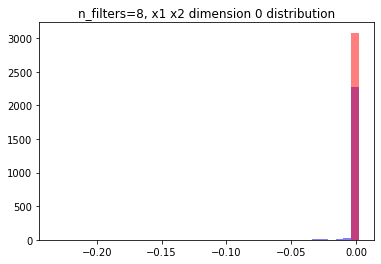

In [18]:
def overlapRatio(x1,x2,title='before alignment',nthFeature=0):
    plt.figure()
    a = x1[:,nthFeature]
    b = x2[:,nthFeature]
    _max=max(max(a),max(b))
    _min=min(min(a),min(b))
    bins = np.arange(_min,_max,(_max-_min)/40)
    hist1=plt.hist(a,bins=bins,fc=(0, 0, 1, 0.5)) #np.arange(-2,2,0.1)
    # plt.figure()
    hist2=plt.hist(b,bins=bins,fc=(1, 0, 0, 0.5))
    plt.title(f"{title}, x1 x2 dimension 0 distribution")

    t = np.concatenate([np.expand_dims(hist1[0], axis=0) , np.expand_dims(hist2[0], axis=0)],axis=0)
    _overlapRatio = np.sum(np.min(t,axis=0)) / np.sum(hist1[0])
    return _overlapRatio


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=8')

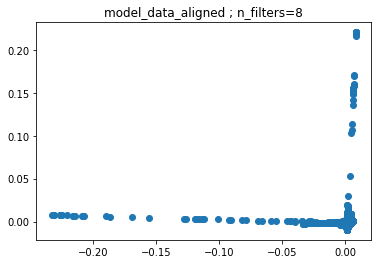

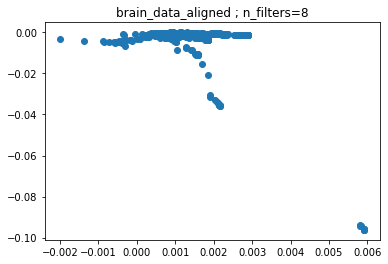

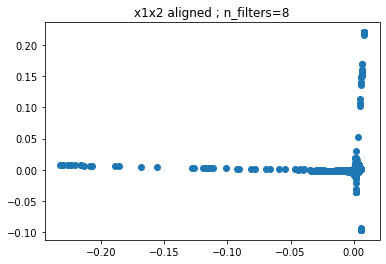

/gpfs/milgram/project/turk-browne/kp578/conda_envs/harmonic/lib/python3.9/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 109 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
2021-07-26 03:53:21,070:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:53:31,913:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:55:11,101:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (6214 x 6214) may take some time.


n_filters=2, overlapRatio=0.7969052224371374


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=2')

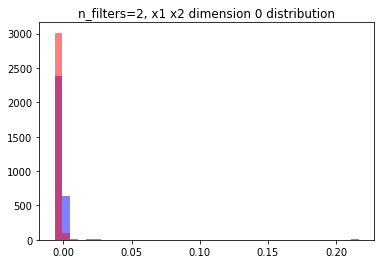

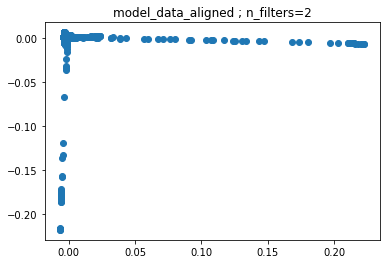

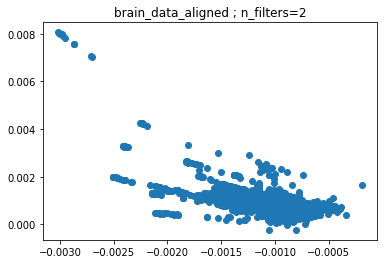

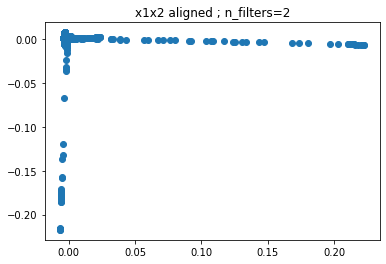

In [23]:

n_filters = 2
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=2,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(model_data, brain_data)
XY_aligned = align_op.diffusion_map()

model_data_aligned=XY_aligned[:model_data.shape[0]]
brain_data_aligned=XY_aligned[model_data.shape[0]:]

_overlapRatio = overlapRatio(model_data_aligned,brain_data_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(model_data_aligned[:,0],model_data_aligned[:,1])
plt.title(f'model_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(brain_data_aligned[:,0],brain_data_aligned[:,1])
plt.title(f'brain_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合



/gpfs/milgram/project/turk-browne/kp578/conda_envs/harmonic/lib/python3.9/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 109 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
2021-07-26 03:41:58,180:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:42:08,958:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:44:02,340:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (6214 x 6214) may take some time.


n_filters=8, overlapRatio=0.7368932038834951


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=8')

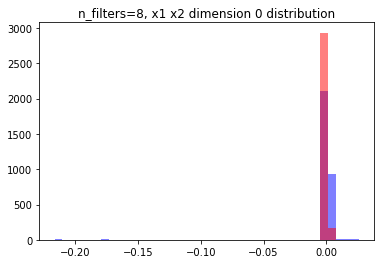

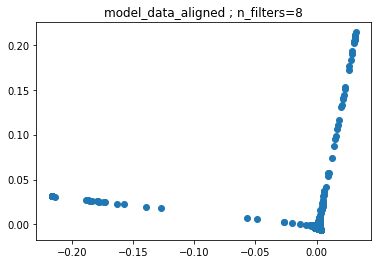

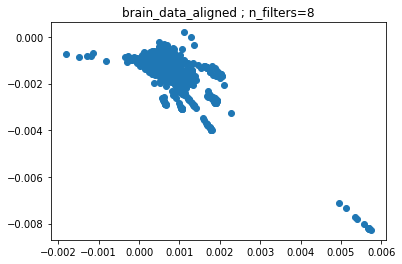

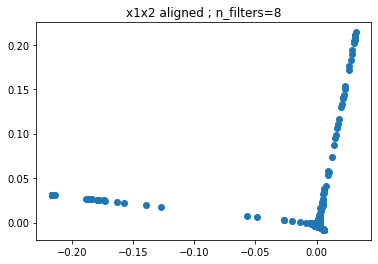

In [20]:

n_filters = 8
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=8,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(model_data, brain_data)
XY_aligned = align_op.diffusion_map()

model_data_aligned=XY_aligned[:model_data.shape[0]]
brain_data_aligned=XY_aligned[model_data.shape[0]:]

_overlapRatio = overlapRatio(model_data_aligned,brain_data_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(model_data_aligned[:,0],model_data_aligned[:,1])
plt.title(f'model_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(brain_data_aligned[:,0],brain_data_aligned[:,1])
plt.title(f'brain_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合



/gpfs/milgram/project/turk-browne/kp578/conda_envs/harmonic/lib/python3.9/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 109 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
2021-07-26 03:45:11,235:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:45:22,064:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:47:28,159:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (6214 x 6214) may take some time.


n_filters=16, overlapRatio=0.776307295029051


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=16')

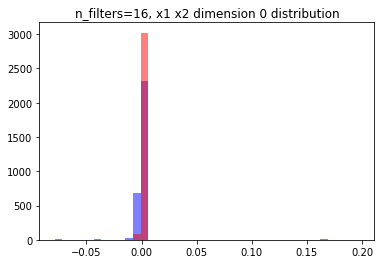

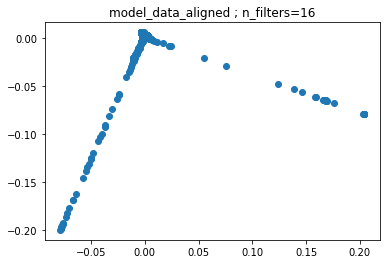

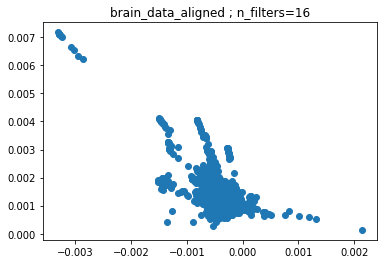

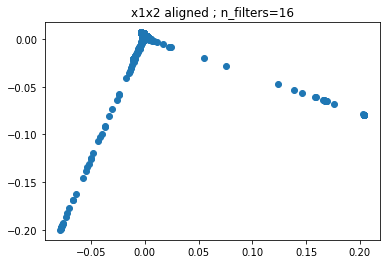

In [21]:

n_filters = 16
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=16,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(model_data, brain_data)
XY_aligned = align_op.diffusion_map()

model_data_aligned=XY_aligned[:model_data.shape[0]]
brain_data_aligned=XY_aligned[model_data.shape[0]:]

_overlapRatio = overlapRatio(model_data_aligned,brain_data_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(model_data_aligned[:,0],model_data_aligned[:,1])
plt.title(f'model_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(brain_data_aligned[:,0],brain_data_aligned[:,1])
plt.title(f'brain_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合



/gpfs/milgram/project/turk-browne/kp578/conda_envs/harmonic/lib/python3.9/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 109 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
2021-07-26 03:48:36,832:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:48:47,654:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 03:52:12,242:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (6214 x 6214) may take some time.


n_filters=64, overlapRatio=0.9297961824652217


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=64')

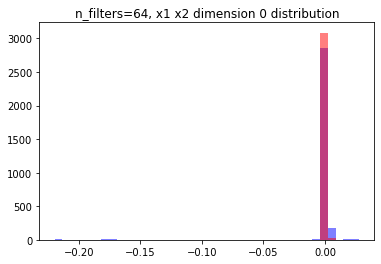

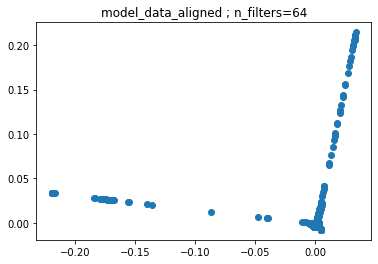

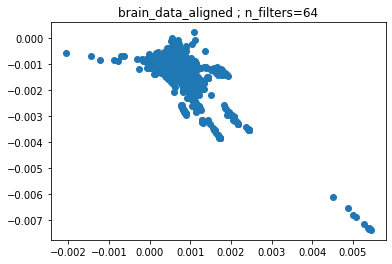

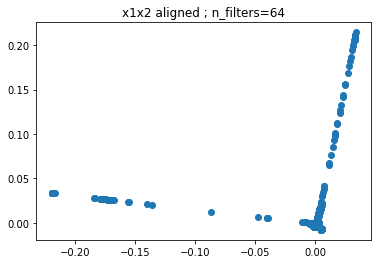

In [22]:

n_filters = 64
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=64,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(model_data, brain_data)
XY_aligned = align_op.diffusion_map()

model_data_aligned=XY_aligned[:model_data.shape[0]]
brain_data_aligned=XY_aligned[model_data.shape[0]:]

_overlapRatio = overlapRatio(model_data_aligned,brain_data_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(model_data_aligned[:,0],model_data_aligned[:,1])
plt.title(f'model_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(brain_data_aligned[:,0],brain_data_aligned[:,1])
plt.title(f'brain_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合



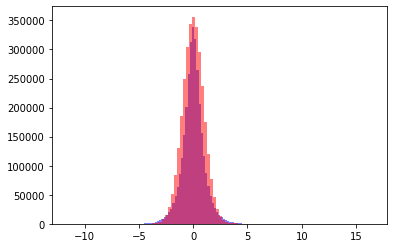

In [33]:
from scipy.stats import zscore
def normalize(X): # 默认是对每一列单独标准化 mean=0 std=1
    _X=X.copy()
    _X = zscore(_X, axis=0)
    _X[np.isnan(_X)]=0
    return _X

_model_data=normalize(model_data)
_brain_data=normalize(brain_data)
_=plt.hist(_model_data.reshape(-1),bins=100,fc=(0, 0, 1, 0.5))


_=plt.hist(_brain_data.reshape(-1),bins=100,fc=(1, 0, 0, 0.5))


/gpfs/milgram/project/turk-browne/kp578/conda_envs/harmonic/lib/python3.9/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 109 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
2021-07-26 08:38:36,803:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 08:38:48,503:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3107 x 3107) may take some time.
2021-07-26 08:42:23,185:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (6214 x 6214) may take some time.


n_filters=64, overlapRatio=0.09090909090909091


Text(0.5, 1.0, 'x1x2 aligned ; n_filters=64')

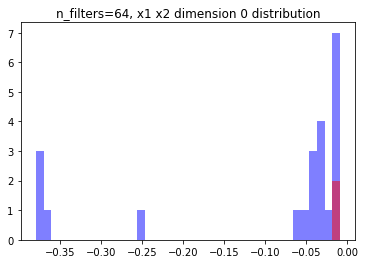

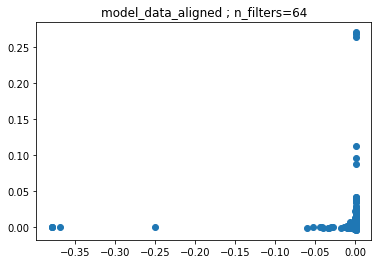

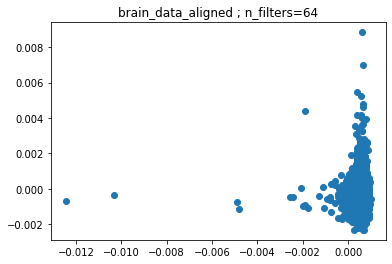

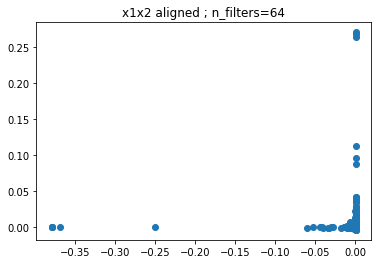

In [34]:

n_filters = 64
align_op = harmonicalignment.HarmonicAlignment(
            int(n_filters),
            t=1, # 1
            overlap=64,
            verbose=0,
            knn_X=20, # 20
            knn_Y=20, # 20
            knn_XY=10, # 10
            decay_X=20, # 20
            decay_Y=20, # 20
            decay_XY=10, # 10
            n_pca_X=100, # 100
            n_pca_Y=100, # 100
            n_pca_XY=None, # None
        )
align_op.align(_model_data, _brain_data)
XY_aligned = align_op.diffusion_map()

model_data_aligned=XY_aligned[:model_data.shape[0]]
brain_data_aligned=XY_aligned[model_data.shape[0]:]

_overlapRatio = overlapRatio(model_data_aligned,brain_data_aligned,title=f'n_filters={n_filters}')
print(f"n_filters={n_filters}, overlapRatio={_overlapRatio}")


# 分别作图
plt.figure()
plt.scatter(model_data_aligned[:,0],model_data_aligned[:,1])
plt.title(f'model_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(brain_data_aligned[:,0],brain_data_aligned[:,1])
plt.title(f'brain_data_aligned ; n_filters={n_filters}')
plt.figure()
plt.scatter(XY_aligned[:,0],XY_aligned[:,1])
plt.title(f'x1x2 aligned ; n_filters={n_filters}')
# 发现效果非常差，因为原始数据是瑞士卷的数据的原始版x1和放大版x2
# 但是我得到的xb1_aligned 和 xb2_aligned 看到的效果是完全不重合



In [41]:
!pip install --user phate


In [42]:
# python -c "import phate"
import phate

ModuleNotFoundError: No module named 'phate'